In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
%matplotlib notebook


#adding dependencies for API pulls
import requests
from pprint import pprint
from config import access_key

In [2]:
# Reference files
stocks_10yr_df = pd.read_csv("Resources/stocks_10yr_df.csv")
stocks_2020_df = pd.read_csv("Resources/stocks_2020_df.csv")
reduced_data = pd.read_csv("Resources/reduced_data.csv")
month_data_df = pd.read_csv("Resources/month_data_df.csv")
countries_data = pd.read_csv("Resources/countries_data.csv")
currencyDF2020 = pd.read_csv("Resources/currencyDF2020.csv")
currencydf = pd.read_csv("Resources/currencydf.csv")

In [3]:
# Create a new data frame from the covid data 
country_data = countries_data.loc[:, ["location", "date", "new_cases", "new_deaths"]]

# Convert date field from an object to date/time
country_data['date']= pd.to_datetime(country_data['date'])

In [4]:
# Create a new data frame with all the dates of the year in it
days2020 = pd.date_range(start='2020-01-01', end='2020-12-31')
days2020_df = pd.DataFrame(days2020, columns=['date'])
days2020_df

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05
...,...
361,2020-12-27
362,2020-12-28
363,2020-12-29
364,2020-12-30


In [5]:
usa_covid = country_data.loc[(country_data['location'] == 'United States')]

In [11]:
stocks_date = stocks_2020_df.rename(columns={'Date':'date'})
stocks_date['date']= pd.to_datetime(stocks_date['date'])

In [17]:
stocks_2020_merged = stocks_date.merge(days2020_df, how='outer', on='date', sort=True)
stocks_2020_merged.head()

,date,Brazil Bovespa (%),Canada S&P TSX Composite (%),China Shanghai Composite (%),Germany DAX (%),India BSE Sensex 30 (%),Japan Nikkei 225 (%),Mexico S&P BMV IPC (%),USA Down Jones (%)
0,2020-01-01,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN
1,2020-01-02,2.53,0.21,1.15,1.03,0.78,NaN,2.06,1.16
2,2020-01-03,-0.73,-0.20,-0.05,-1.25,-0.39,NaN,0.42,-0.81
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
usa_covid_merged = usa_covid.merge(days2020_df, how='outer', on='date', sort=True)
usa_covid_merged.head()

,location,date,new_cases,new_deaths
0,NaN,2020-01-01,NaN,NaN
1,NaN,2020-01-02,NaN,NaN
2,NaN,2020-01-03,NaN,NaN
3,NaN,2020-01-04,NaN,NaN
4,NaN,2020-01-05,NaN,NaN


<IPython.core.display.Javascript object>


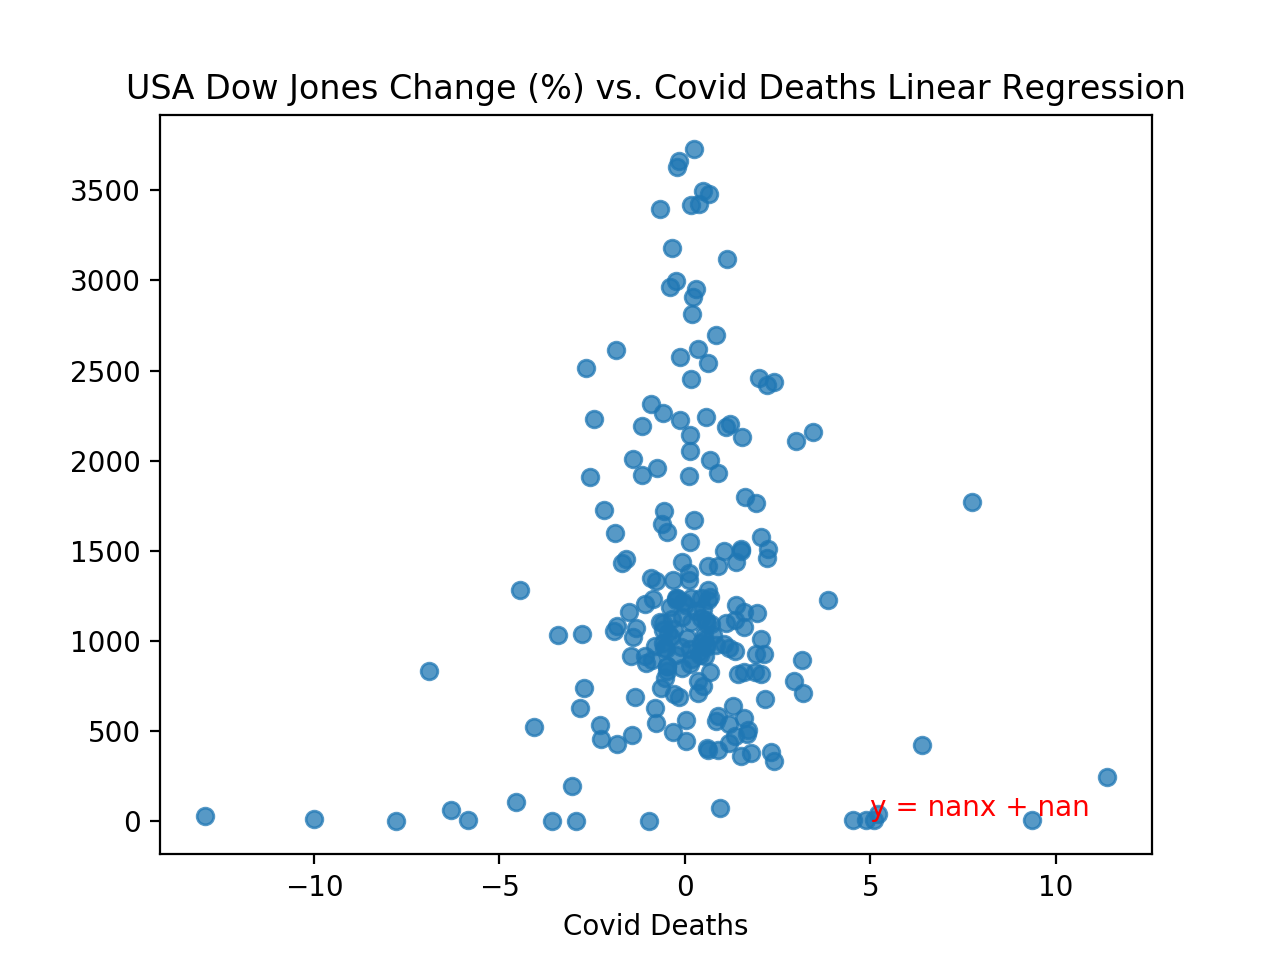

The r-value is: nan


In [23]:
# Define variables
usa_stock_list = stocks_2020_merged['USA Down Jones (%)']   
usa_covid_death = usa_covid_merged['new_deaths']

# Create labels for plot
title_usa = "USA Dow Jones Change (%) vs. Covid Deaths Linear Regression"
xlabel_usa = "Dow Jones"
ylabel_usa = "Covid Deaths"

# Plot the location of the line equation
loc_usa = (5,25)

# Create a function for plotting the scatter chart and linear regression
def linear_regress_stocks(deaths, stocks, title, xlabel, ylabel, anno_loc):
    
    #calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(stocks, deaths)
    regress_values = stocks * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    #Plot the data
    plt.scatter(stocks, deaths, alpha=.75)

   #Plot the linear regression
    plt.plot(deaths, regress_values, "r-")
    plt.annotate(line_eq, anno_loc, color='red')
    print(f"The r-value is: {rvalue**2}")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.xlabel(ylabel)
    
    return plt.show()

linear_regress_stocks(usa_covid_death, usa_stock_list, title_usa, xlabel_usa, ylabel_usa, loc_usa)

<IPython.core.display.Javascript object>


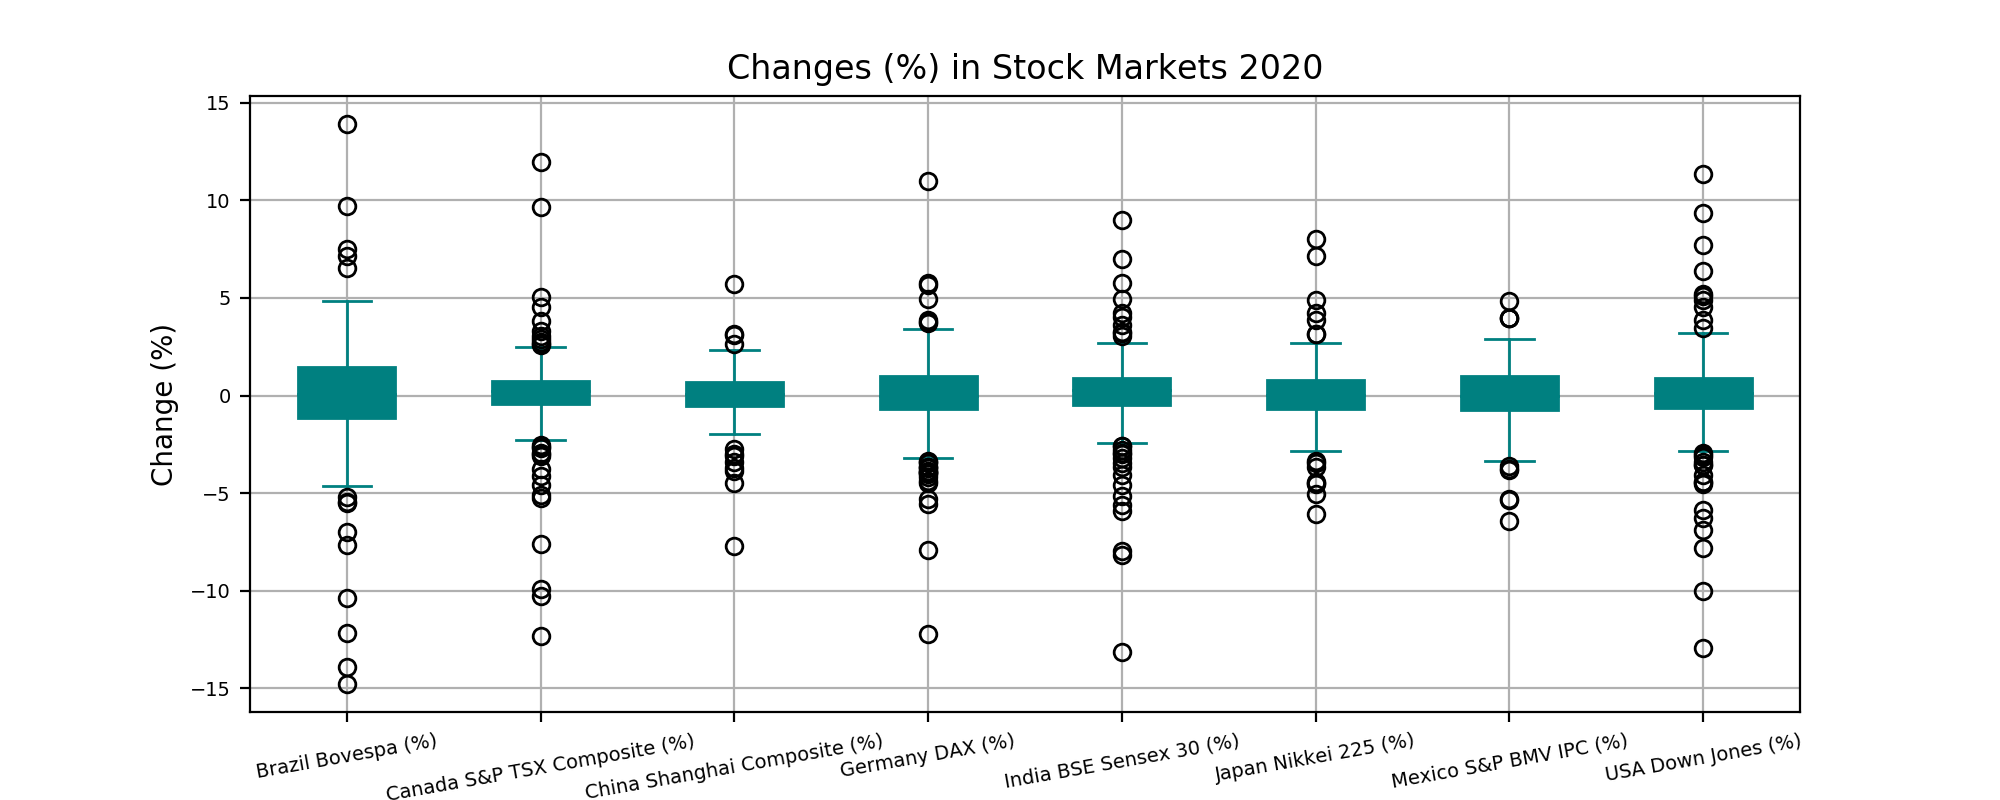

Text(0.5, 0, 'Countries')

In [17]:
# Create a boxplot to compare 2020
stocks_2020_df.boxplot(column=['Brazil Bovespa (%)', 'Canada S&P TSX Composite (%)', 'China Shanghai Composite (%)', \
                                 'Germany DAX (%)', 'India BSE Sensex 30 (%)', 'Japan Nikkei 225 (%)', \
                                 'Mexico S&P BMV IPC (%)', 'USA Down Jones (%)'], \
                                 figsize=(10, 4), rot=10, fontsize=7,\
                                 patch_artist=True, color='teal')
plt.title('Changes (%) in Stock Markets 2020')
plt.ylabel('Change (%)')
plt.xlabel('Countries')

In [10]:
# Create groups
group1 = stocks_2020_df["Brazil Bovespa (%)"].dropna()
group2 = stocks_2020_df["Canada S&P TSX Composite (%)"].dropna()
group3 = stocks_2020_df["China Shanghai Composite (%)"].dropna()
group4 = stocks_2020_df["Germany DAX (%)"].dropna()
group5 = stocks_2020_df["India BSE Sensex 30 (%)"].dropna()
group6 = stocks_2020_df["Japan Nikkei 225 (%)"].dropna()
group7 = stocks_2020_df["Mexico S&P BMV IPC (%)"].dropna()
group8 = stocks_2020_df["USA Down Jones (%)"].dropna()

In [11]:
# Run ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# The pvalue indicates they are very similar data sets

F_onewayResult(statistic=0.028291061625711354, pvalue=0.9999755781591606)

<IPython.core.display.Javascript object>


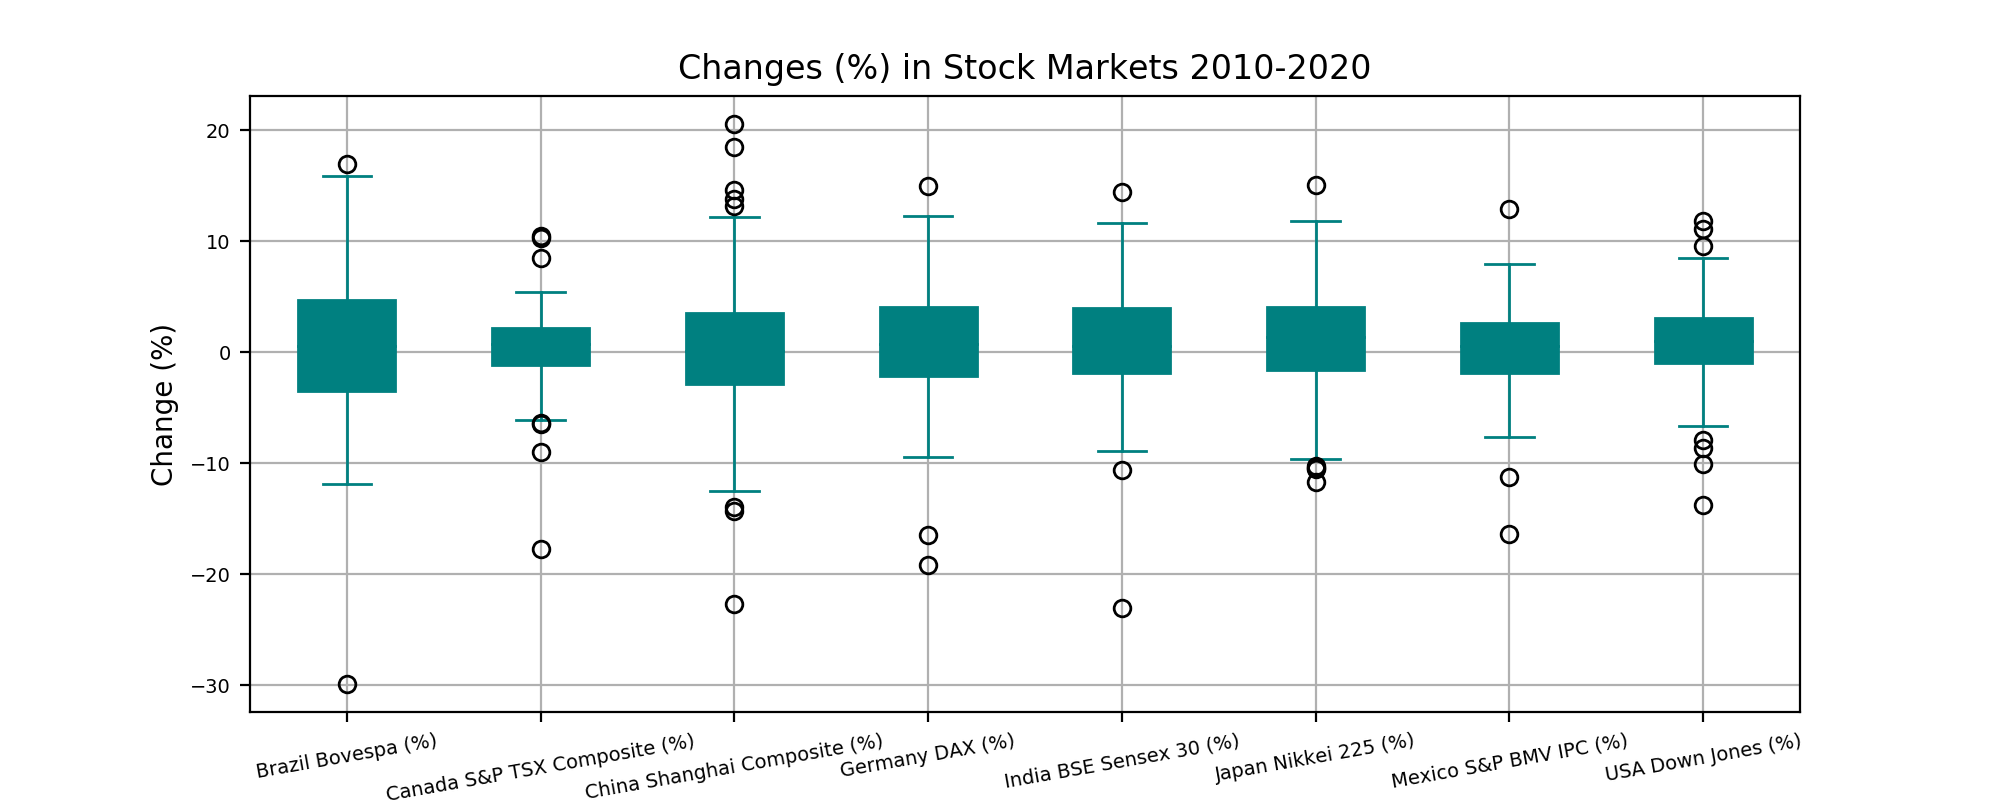

Text(0.5, 0, 'Countries')

In [10]:
# Create a boxplot to compare 2010-2020 data
stocks_10yr_df.boxplot(column=['Brazil Bovespa (%)', 'Canada S&P TSX Composite (%)', 'China Shanghai Composite (%)', \
                                 'Germany DAX (%)', 'India BSE Sensex 30 (%)', 'Japan Nikkei 225 (%)', \
                                 'Mexico S&P BMV IPC (%)', 'USA Down Jones (%)'], \
                                 figsize=(10, 4), rot=10, fontsize=7,\
                                 patch_artist=True, color='teal')
plt.title('Changes (%) in Stock Markets 2010-2020')
plt.ylabel('Change (%)')
plt.xlabel('Countries')

In [12]:
# Create groups
group1 = stocks_10yr_df["Brazil Bovespa (%)"]
group2 = stocks_10yr_df["Canada S&P TSX Composite (%)"]
group3 = stocks_10yr_df["China Shanghai Composite (%)"]
group4 = stocks_10yr_df["Germany DAX (%)"]
group5 = stocks_10yr_df["India BSE Sensex 30 (%)"]
group6 = stocks_10yr_df["Japan Nikkei 225 (%)"]
group7 = stocks_10yr_df["Mexico S&P BMV IPC (%)"]
group8 = stocks_10yr_df["USA Down Jones (%)"]

In [13]:
# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# The pvalue indicates they are very similar data sets

F_onewayResult(statistic=0.40599148795069967, pvalue=0.8989735855749987)